For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    - What is the probability that no cars drive up in the noon hour?
    - What is the probability that 3 or more cars come through the drive through?
    - How likely is it that the drive through gets at least 1 car?

##### Experimental

In [2]:
# simulation using .rvs on distribution object

# represent data
# create matrix
n_simulations = 100_000

cars_at_noon_ex_one = stats.poisson(2).rvs(n_simulations)
cars_at_noon_ex_one

array([2, 1, 3, ..., 2, 2, 1])

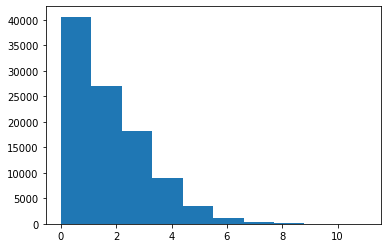

In [3]:
plt.hist(cars_at_noon_ex_one)
plt.show()

In [4]:
# What is the probability that no cars drive up in the noon hour?
(cars_at_noon_ex_one == 0).mean()

0.13642

In [5]:
# What is the probability that 3 or more cars come through the
# drive through?
(cars_at_noon_ex_one >= 3).mean()

0.32367

In [6]:
# How likely is it that the drive through gets at least 1 car?
(cars_at_noon_ex_one > 0).mean()

0.86358

In [7]:
# simulation using using numpy

# represent data
# create matrix

cars_at_noon_ex_two = np.random.poisson(2, size=(n_simulations))
cars_at_noon_ex_two

array([2, 1, 2, ..., 5, 1, 3])

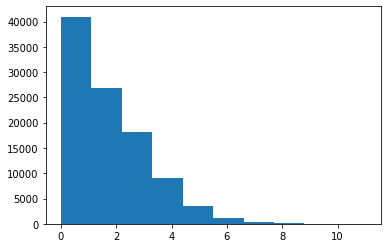

In [8]:
plt.hist(cars_at_noon_ex_two)
plt.show()

In [9]:
# What is the probability that no cars drive up in the noon hour?
(cars_at_noon_ex_two == 0).mean()

0.13676

In [10]:
# What is the probability that 3 or more cars come through the
# drive through?
(cars_at_noon_ex_two >= 3).mean()

0.32115

In [11]:
# How likely is it that the drive through gets at least 1 car?
(cars_at_noon_ex_two > 0).mean()

0.86324

###### Theoretical

In [12]:
cars_at_noon_th = stats.poisson(2)
cars_at_noon_th

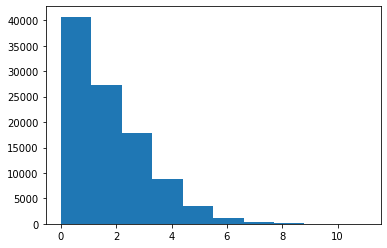

In [13]:
plt.hist(cars_at_noon_th.rvs(100_000))
plt.show()

In [14]:
# What is the probability that no cars drive up in the noon hour?
cars_at_noon_th.pmf(0)

0.1353352832366127

In [15]:
# What is the probability that 3 or more cars come through the
# drive through?
cars_at_noon_th.sf(2)

0.32332358381693654

In [16]:
# How likely is it that the drive through gets at least 1 car?
cars_at_noon_th.sf(0)

0.8646647167633873

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

###### Experimental

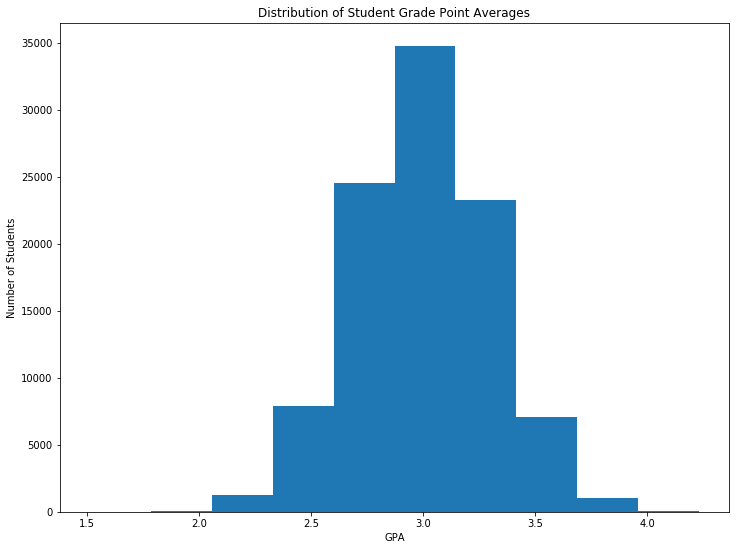

In [17]:
# simulation using using numpy
n_simulations = 100_000
n_trials = 1

# represent data
# create matrix
grades_ex = np.random.normal(3, .3, size=(n_simulations, n_trials))
plt.figure(figsize=(12,9))
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Grade Point Averages")
plt.hist(grades_ex)
plt.show()

In [18]:
grades_ex

array([[2.47437111],
       [2.68321625],
       [2.89069539],
       ...,
       [2.84535479],
       [2.89958035],
       [3.14944726]])

In [19]:
# What grade point average is required to be in the top 5% of the
# graduating class?
np.percentile(grades_ex, 95)

3.4919125937306883

In [20]:
# What GPA constitutes the bottom 15% of the class?
np.percentile(grades_ex, 15)

2.687968902012367

In [21]:
# An eccentric alumnus left scholarship money for students in the
# third decile from the bottom of their class.
# Determine the range of the third decile.
# Would a student with a 2.8 grade point average qualify for this
# scholarship?
print(np.percentile(grades_ex, 30))
print(np.percentile(grades_ex, 40))

2.8407846578294946
2.9240959383745873


In [37]:
# If I have a GPA of 3.5, what percentile am I in?
(grades_ex >= 3.5).mean()

0.0474

###### Theoretical

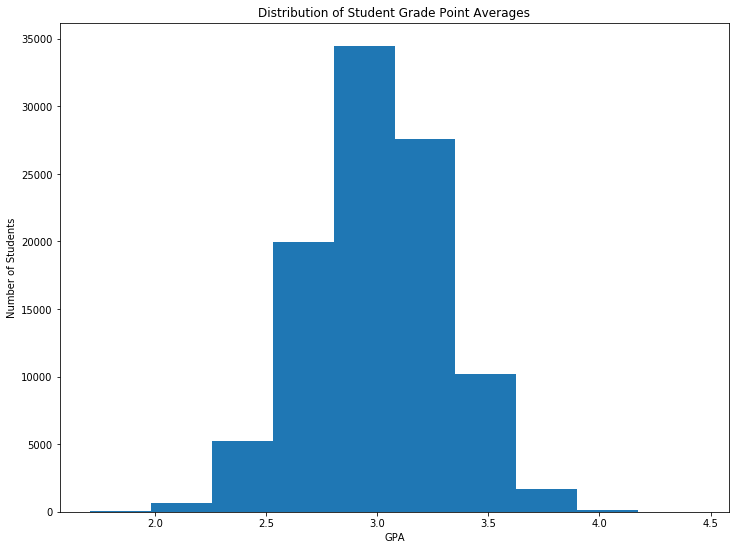

In [22]:
mean = 3
std = .3

grades_th = stats.norm(mean, std)
plt.figure(figsize=(12,9))
plt.hist(grades_th.rvs(n_simulations))
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Grade Point Averages")
plt.show()

In [23]:
# What grade point average is required to be in the top 5% of the
# graduating class?
grades_th.isf(.05) # top 5%

3.4934560880854417

In [24]:
# What grade point average is required to be in the top 5% of the
# graduating class?
grades_th.ppf(.95) # 95th percentile

3.4934560880854417

In [25]:
# What GPA constitutes the bottom 15% of the class?
grades_th.isf(.85) # bottom 15%

2.689069983151863

In [26]:
# What GPA constitutes the bottom 15% of the class?
grades_th.ppf(.15) # 15th percentile

2.689069983151863

---
###### Question

In [27]:
# An eccentric alumnus left scholarship money for students in the
# third decile from the bottom of their class.
# Determine the range of the third decile.
# Would a student with a 2.8 grade point average qualify for this
# scholarship?
third_decile = 3 / 10
fourth_decile = 4 / 10
print(third_decile)
print(fourth_decile)

0.3
0.4


In [32]:
print(grades_th.ppf(third_decile))
print(grades_th.ppf(fourth_decile))

2.842679846187588
2.9239958690592602


---

In [29]:
# If I have a GPA of 3.5, what percentile am I in?
grades_th.sf(3.5) # 95th percentile

0.0477903522728147

In [30]:
# If I have a GPA of 3.5, what percentile am I in?
grades_th.cdf(3.5) # top 5%

0.9522096477271853

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

###### Experimental

In [64]:
n = 4326 # number of trials
p = .02 # probability
n_simulations = 100_000

(np.random.binomial(n, p, size=(n_simulations)) >= 97).mean()

0.14073

###### Theoretical

In [65]:
n = 4326 # number of trials
p = .02 # probability
stats.binom(n, p).sf(96)

0.1397582363130086

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

    - What is the probability that at least one of your first 60 answers is correct?

###### Experimental

###### Theoretical